In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

<IPython.core.display.Javascript object>

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [3]:
df=df.drop(['ID#'],axis=1)

In [4]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [6]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.shape

(3999, 11)

# normalisation of dataset

In [8]:
scaler= StandardScaler()
scaled_df=scaler.fit_transform(df)

In [9]:
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [10]:
scaler1=MinMaxScaler()
scaled_df1=scaler1.fit_transform(df.iloc[:,:].to_numpy())
df1=pd.DataFrame(scaled_df1,columns=df.columns)
df1

<IPython.core.display.Javascript object>

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [11]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [12]:
df_norm=norm(df.iloc[:,:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierarchical clustering

<IPython.core.display.Javascript object>

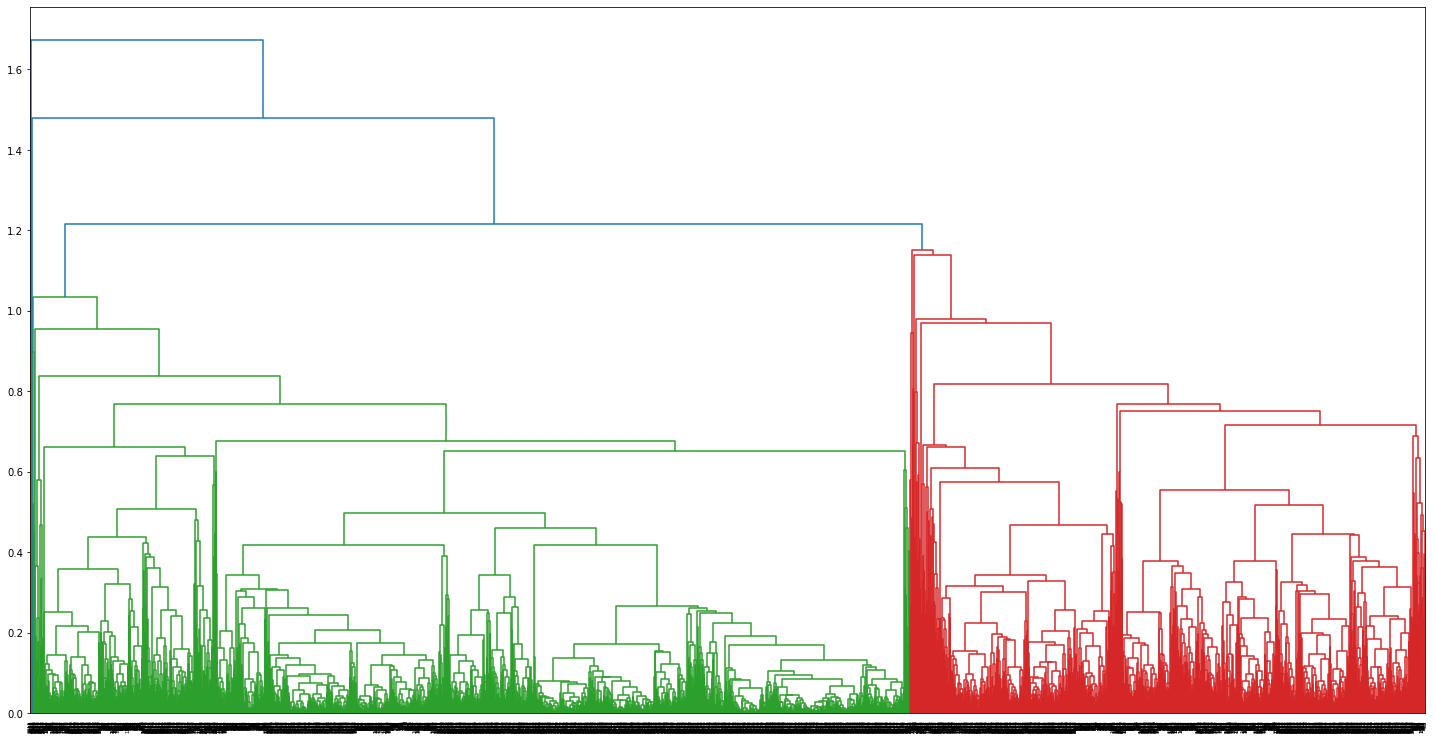

In [13]:
plt.figure(figsize=(25,13))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [14]:
ac=AgglomerativeClustering(n_clusters=10,linkage='average',affinity='euclidean')
y_pred_ac=ac.fit_predict(df_norm)
y_pred_ac

array([3, 3, 3, ..., 4, 3, 3], dtype=int64)

In [15]:
clusters_hie=pd.DataFrame(y_pred_ac,columns=['clusters'])
clusters_hie

<IPython.core.display.Javascript object>

,clusters
0,3
1,3
2,3
3,3
4,4
...,...
3994,4
3995,4
3996,4
3997,3


In [16]:
clusters_hie.value_counts()

clusters
3           2510
4           1444
7             17
0              8
2              7
6              6
1              4
5              1
8              1
9              1
dtype: int64

In [17]:
df_norm['clusters_hie']=clusters_hie
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hie
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,3
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,3
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,3
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,3
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,4
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,4
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,4
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,3


In [18]:
df_norm.sort_values('clusters_hie')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hie
384,0.016537,0.0,1.00,0.0,0.75,0.392347,0.372093,0.000000,0.000000,0.841331,1.0,0
1946,0.074419,0.0,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,0
850,0.015033,0.0,0.75,0.0,1.00,0.406955,0.418605,0.019470,0.037736,0.719074,1.0,0
1917,0.048674,0.0,1.00,0.0,0.50,0.399435,0.511628,0.032450,0.037736,0.477695,1.0,0
1878,0.075258,0.0,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.068821,0.0,0.00,0.5,0.00,0.024453,0.127907,0.000000,0.000000,0.893899,1.0,7
1383,0.010649,0.0,0.00,0.5,0.00,0.029384,0.186047,0.000000,0.000000,0.639981,1.0,7
3762,0.043717,0.0,0.00,0.5,0.00,0.041390,0.197674,0.024337,0.056604,0.416446,1.0,7
2840,0.005019,0.0,0.00,0.0,0.00,0.760840,0.058140,0.020184,0.056604,0.235471,1.0,8


# k-means clustering

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(df_norm)

KMeans(n_clusters=5, random_state=0)

In [21]:
kmeans.inertia_

553.6175696204923

In [53]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
sil_score = []
cal_haz_score =[]
wcss=[] # within clusters sum of squares
for i in range(1,16):
    kmean=KMeans(n_clusters=i,random_state=0)
    kmean.fit(df_norm)
    wcss.append(kmean.inertia_)
    if i==1:
        continue
    sil_score.append(silhouette_score(df_norm,kmean.labels_))
    cal_haz_score.append(calinski_harabasz_score(df_norm,kmean.labels_))

    

In [54]:
sil_score

[0.7095421920338081,
 0.639009676759656,
 0.6048483804448053,
 0.6609898182068293,
 0.7000142176542364,
 0.7631286540747763,
 0.8152493430664788,
 0.8278857389640716,
 0.8342746530672267,
 0.8339711327424558,
 0.7273695989002801,
 0.6729334582373813,
 0.64092886362069,
 0.6328805246345282]

In [55]:
cal_haz_score

[16277.411554719985,
 13294.988685473401,
 14345.99385884894,
 14284.8296235084,
 16383.808826014434,
 19930.984084806678,
 30823.480477880836,
 47492.034154858295,
 60748.25799624577,
 57680.06818262962,
 55384.54430475677,
 52975.65084260446,
 50480.61106537471,
 49656.843913543795]

In [23]:
wcss

[3195.147801505574,
 1149.3955008708035,
 938.7941276394264,
 757.3724860531964,
 553.6175696204923,
 451.60412276114823,
 363.83444583279686,
 331.2647390794315,
 304.8086947756615,
 280.35582896437165,
 262.47909898770786,
 244.65488266863636,
 230.07978854494706,
 220.91452927796126,
 210.4347472554715]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

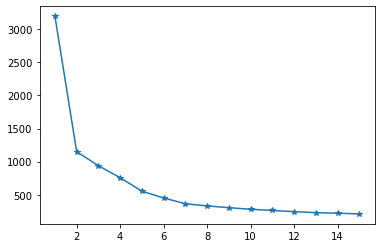

In [24]:
plt.plot(np.arange(1,16),wcss,'*-')

In [25]:
# from the above ELBOW chart, 10 number of clusters seems to be optimum

In [26]:
clusters_kmeans=KMeans(n_clusters=10,random_state=42)
clusters_kmeans.fit(df_norm)

KMeans(n_clusters=10, random_state=42)

In [27]:
clusters_kmeans.labels_

array([1, 1, 1, ..., 7, 6, 6])

In [28]:
df_norm['clusters_KMeans']=clusters_kmeans.labels_

In [29]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hie,clusters_KMeans
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,3,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,3,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,3,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,3,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,4,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,4,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,4,7
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,3,6


In [30]:
df_norm['clusters_KMeans'].value_counts()

6    1032
1     868
7     426
2     367
0     338
8     316
9     314
3     301
4      25
5      12
Name: clusters_KMeans, dtype: int64

# DBSCAN clustering

In [31]:
from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>

{'whiskers': [<matplotlib.lines.Line2D at 0x1d49ba812b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d49ba81760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d49b897d00>,
 'medians': [<matplotlib.lines.Line2D at 0x1d49ba81df0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d49ba81220>,
 'means': []}

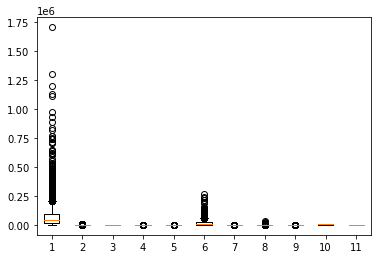

In [34]:
plt.boxplot(df)

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\OMKAR\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\OMKAR\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\OMKAR\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\OMKAR\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

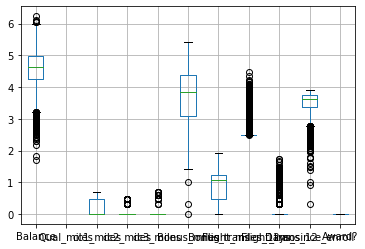

In [35]:
df.apply(np.log10).boxplot()

In [36]:
dbscan = DBSCAN(eps=0.5,min_samples=10)
dbscan.fit(df_norm)

DBSCAN(min_samples=10)

In [37]:
dbscan.labels_

array([0, 0, 0, ..., 4, 5, 5], dtype=int64)

In [46]:
df['cluster_dbscan']=dbscan.labels_
df['cluster_hie']=clusters_hie
df['cluster_kmeans']=clusters_kmeans.labels_

In [47]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_dbscan,cluster_hie,cluster_kmeans
0,28143,0,1,1,1,174,1,0,0,7000,0,0,3,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,3,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,3,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,3,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,7,4,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,7,4,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4,4,7
3997,54899,0,1,1,1,500,1,500,1,1401,0,5,3,6


In [48]:
print(df['cluster_hie'].value_counts())
print(df['cluster_kmeans'].value_counts())
print(df['cluster_dbscan'].value_counts())

3    2510
4    1444
7      17
0       8
2       7
6       6
1       4
5       1
9       1
8       1
Name: cluster_hie, dtype: int64
6    1032
1     868
7     426
2     367
0     338
8     316
9     314
3     301
4      25
5      12
Name: cluster_kmeans, dtype: int64
 5    1017
 0     856
 4     426
 1     367
 7     338
 3     313
 6     313
 2     298
-1      71
Name: cluster_dbscan, dtype: int64


1) given dataset is analysed for all the three algorithms
2) the cluster distribution by the Hierarchical clusteirng is not uniform. all the observations are analysed bu using average methid on linkage. majority of observations are included in only 3 clusetrs while rest are occupying remaining clusters.
3) kmeans clustering divided the dataset in quite uniform way. from elbow graph, it is clear that 10 number of clusetrs are optimum beyond which the increasing number of clusters will not change "wcss" significatly.
4) dbscan also divide the dataset in uniform way. DBSCAN also detected the "outliers" from the dataset. the number of clusetrs are dicided by the code only. this code detects pattern of distribution in the dataset and accordingly clubs the observations in the same clusters using directly density rechable technique. 